### 1. LINEAR REGRESSION

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

#Input data
A1_time = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16]).reshape(-1, 1)
A1_stroke = np.array([0, 0.51, 0.99, 1.53, 2.04, 2.48, 3.02, 3.55, 4.00])

A2_time = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16]).reshape(-1, 1)
A2_stroke = np.array([0, 0.18, 0.46, 0.88, 1.4, 2.03, 3.16, 3.94, 4.97])

print(A1_stroke)
print(A2_stroke)

[0.   0.51 0.99 1.53 2.04 2.48 3.02 3.55 4.  ]
[0.   0.18 0.46 0.88 1.4  2.03 3.16 3.94 4.97]


**1. Report the parameters of the model for each actuator. How do these
compare to the specifications?**

In [239]:
#Linear Regression Model(A1)
Lin_Reg = LinearRegression()

#A1 Actuator model
A1_model = Lin_Reg.fit(A1_time, A1_stroke)
A1_slope = A1_model.coef_[0]
A1_intercept = A1_model.intercept_

#Display parameters
print("Parameters for Actuator 1 :-")
print("Slope of Actuator 1 :", A1_slope)
print("Intercept of Actuator 1 :", A1_intercept )


Parameters for Actuator 1 :-
Slope of Actuator 1 : 0.2510833333333334
Intercept of Actuator 1 : 0.004666666666666597


In [240]:
#Linear Regression Model(A2)
Lin_Reg = LinearRegression()

#A2 Actuator model
A2_model = Lin_Reg.fit(A2_time, A2_stroke)
A2_slope = A2_model.coef_[0]
A2_intercept = A2_model.intercept_

#Display parameters
print("Parameters for Actuator 2 :-")
print("Slope of Actuator 2 :", A2_slope)
print("Intercept of Actuator 2 :", A2_intercept )

Parameters for Actuator 2 :-
Slope of Actuator 2 : 0.31425000000000003
Intercept of Actuator 2 : -0.6228888888888893


**2. Plot the dataset for actuator A1 with the regression line.**

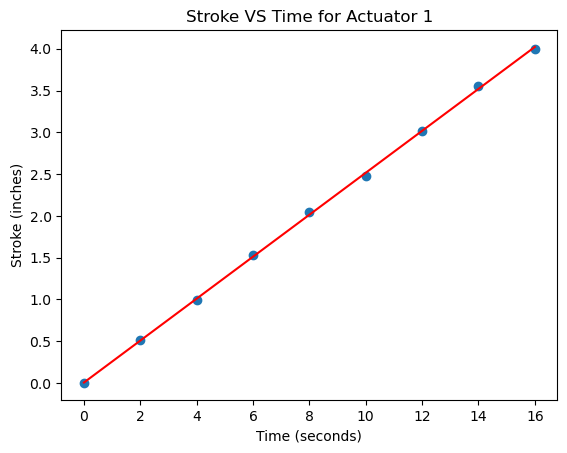

In [241]:
y_pred1 = A1_model.predict(A1_time)

plt.scatter(A1_time,A1_stroke)

plt.plot(A1_time, y_pred1, color="Red")

plt.xlabel("Time (seconds)")
plt.ylabel("Stroke (inches)")
plt.title("Stroke VS Time for Actuator 1")
plt.show()

**3. Plot the dataset for actuator A2 with the regression line.**

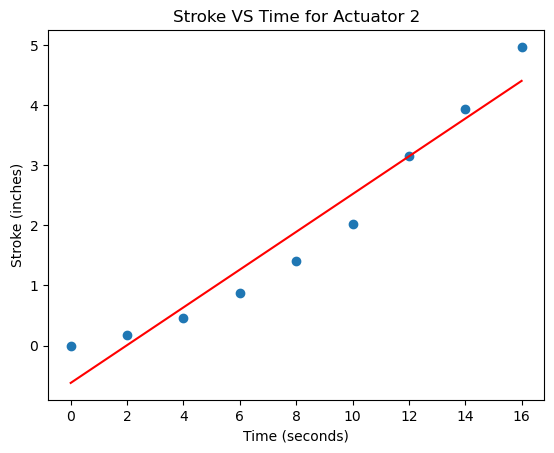

In [242]:
y_pred2 = A2_model.predict(A2_time)

plt.scatter(A2_time,A2_stroke)

plt.plot(A2_time, y_pred2, color="Red")

plt.xlabel("Time (seconds)")
plt.ylabel("Stroke (inches)")
plt.title("Stroke VS Time for Actuator 2")
plt.show()

**4. Which linear regression model fit your observations the best? Provide
justification for your selection.**

In [243]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(A1_stroke, y_pred1)
print("Mean Squared Error:", mse)

R_square = A1_model.score(A1_time,A1_stroke)
print('Coefficient of Determination (R^2 score) for A1 Model:', R_square)

Mean Squared Error: 0.00045759259259258757
Coefficient of Determination (R^2 score) for A1 Model: 0.9997278826162033


In [244]:
mse = mean_squared_error(A2_stroke, y_pred2)
print("Mean Squared Error:", mse)

R_square = A2_model.score(A2_time,A2_stroke)
print('Coefficient of Determination (R^2 score) for A2 Model:', R_square)

Mean Squared Error: 0.15799487654320984
Coefficient of Determination (R^2 score) for A2 Model: 0.9433996139832874


After observing both the model A1 and A2, Linear Regression model fits best for A1 model. We can clearly observe from the plots that the regression line is best fitted for model A1 i.e. for Actuator A1. To justify our observation, we have found mean squared error and R square values. The model with mean squared error value lesser or close to 0 is considered as the best model which means the error is minimum. For R square, the values is higher or closer to 1 is considered as the best fit model. 

From mean squared error(MSE) and R square value we get MSE and R square values as 0.000457 and 0.99972 for Actuator A1 respectively and hence we can say that **Linear Regression analysis for Actuator A fits best.**

### 2. LOGISTIC REGRESSION

In [245]:
from sklearn.preprocessing import StandardScaler

#Creating labels(0 for ActuatorA1, 1 for ActuatorA2)
A1_labels = np.zeros(len(A1_time))
A2_labels = np.ones(len(A2_time))

#Combining data and labels
Both_time = np.concatenate([A1_time, A2_time])
Both_stroke = np.concatenate([A1_stroke, A2_stroke]).reshape(-1,1)
Both_labels = np.concatenate([A1_labels, A2_labels])

#Standardizing features using Standard Scaler
scaler = StandardScaler()
Standard_time = scaler.fit_transform(Both_time)
Standard_stroke = scaler.fit_transform(Both_stroke)

print(Standard_time)
print(Standard_stroke)

[[-1.54919334]
 [-1.161895  ]
 [-0.77459667]
 [-0.38729833]
 [ 0.        ]
 [ 0.38729833]
 [ 0.77459667]
 [ 1.161895  ]
 [ 1.54919334]
 [-1.54919334]
 [-1.161895  ]
 [-0.77459667]
 [-0.38729833]
 [ 0.        ]
 [ 0.38729833]
 [ 0.77459667]
 [ 1.161895  ]
 [ 1.54919334]]
[[-1.30431361]
 [-0.96357374]
 [-0.6428774 ]
 [-0.28209401]
 [ 0.05864586]
 [ 0.35261751]
 [ 0.7134009 ]
 [ 1.06750311]
 [ 1.36815594]
 [-1.30431361]
 [-1.18405248]
 [-0.99697961]
 [-0.71637031]
 [-0.36894927]
 [ 0.05196469]
 [ 0.80693733]
 [ 1.3280689 ]
 [ 2.0162298 ]]


**1. Report the parameters of the model.**

In [246]:
from sklearn.linear_model import LogisticRegression

#Creating Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(np.column_stack((Standard_time, Standard_stroke)), Both_labels)

#Getting parameters
time_coeff = LR_model.coef_[0][0]
stroke_coeff = LR_model.coef_[0][1]
intercept = LR_model.intercept_[0]

#Displaying parameters
print("Parameters for Logistic Regression Model :-")
print("Time Coefficient value :", time_coeff)
print("Stroke Coefficient value :", stroke_coeff)
print("Intercept value" , intercept)

Parameters for Logistic Regression Model :-
Time Coefficient value : 0.14673636610338353
Stroke Coefficient value : -0.18392436374582086
Intercept value -2.548480856948884e-06


In [247]:
y_pred = LR_model.predict(np.column_stack((Standard_time, Standard_stroke)))

print(y_pred)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


**2. Report the accuracy, precision, recall, f1 score of the model on the observations.**

In [248]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Predicting labels
pred_labels = LR_model.predict(np.column_stack((Standard_time, Standard_stroke)))

#Calculating metrics
Accuracy = accuracy_score(Both_labels, pred_labels)
Precision = precision_score(Both_labels, pred_labels)
Recall = recall_score(Both_labels, pred_labels)
F1_Score = f1_score(Both_labels, pred_labels)

#Display metrics
print(" Accuracy Score for Logistic Regression Model :", Accuracy)
print(" Precision for Logistic Regression Model :", Precision)
print(" Recall for Logistic Regression Model :", Recall)
print(" F1 Score for Logistic Regression Model :", F1_Score)

 Accuracy Score for Logistic Regression Model : 0.6666666666666666
 Precision for Logistic Regression Model : 0.6666666666666666
 Recall for Logistic Regression Model : 0.6666666666666666
 F1 Score for Logistic Regression Model : 0.6666666666666666


**3. Plot the decision boundary of the model along with the observations of
each data.**

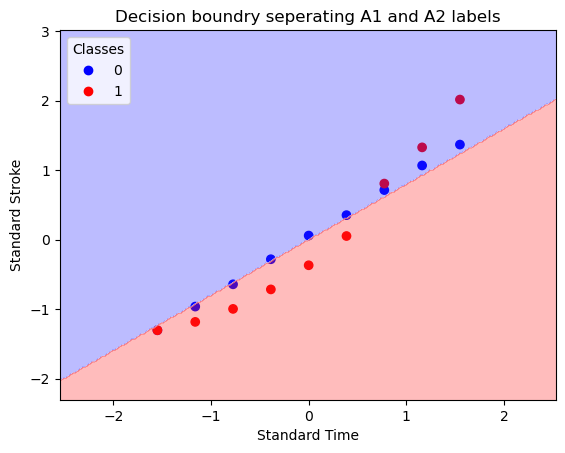

In [249]:
s = plt.scatter(Standard_time, Standard_stroke,c= Both_labels, cmap=plt.cm.bwr, label= Both_labels)
plt.xlabel('Standard Time')
plt.ylabel('Standard Stroke')

#Plotting decision boundary
h = .02

x_min, x_max = Standard_time[:, 0].min() - 1, Standard_time[:, 0].max() + 1
y_min, y_max = Standard_stroke[:, 0].min() - 1, Standard_stroke[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

M = LR_model.predict(np.column_stack((xx.ravel(), yy.ravel())))
M = M.reshape(xx.shape)
plt.contourf(xx, yy, M, cmap=plt.cm.bwr, alpha=0.3)

plt.title("Decision boundry seperating A1 and A2 labels")
plt.legend(*s.legend_elements(), loc="upper left", title="Classes")
plt.show()

From the observations and prediction values we can conclude that when both the datapoints for Actuator A1 and Actuator A2 are used as single label while performing logistic regression, 6 datapoints from 18 data points are labelled incorrectly while rest 12 are labelled correctly.
From the Decision boundry plot we can clearly observe that 3(blue) data points of Class 0 are outside the boundry of Class 0 and assigned to Class 1. Similarly 3(red) data points of Class 1 are outside the boundry of Class 1 and are assigned to Class 0 which means that model is not able to clearly identify the already assigned class for each datapoints.

The Accuracy Score of 0.66 shows that the performance of model for both the classes are Average. The Accuracy Score above 0.70
is considered as Good and below 0.60 is considered as poor.

### 3. SVM

In [250]:
from sklearn import datasets
from sklearn.svm import SVC

#Iris Dataset Load
iris = datasets.load_iris()

#Selecting petal length and sepal width
X = iris.data[:, [2, 1]]  
y = iris.target

**1. Use a support vector machine to classify the data with a linear kernel and
report the equation of the hyperplane for each class.**

In [251]:
#Creating SVM with a linear kernel
SVM_Linear_model = SVC( kernel='linear')

#Training the model
SVM_Linear_model.fit(X, y)

y.shape

(150,)

In [252]:
#Coefficients of hyperplane and intercept
coeff = SVM_Linear_model.coef_
intercept = SVM_Linear_model.intercept_

#Displaying the equation of hyperplane for each class
print("Hyperplane Equation for Class 0: ", coeff[0, 0], "* x1 + ", coeff[0, 1], "* x2 + ", intercept[0], "= 0")
print("Hyperplane Equation for Class 1: ", coeff[1, 0], "* x1 + ", coeff[1, 1], "* x2 + ", intercept[1], "= 0")
print("Hyperplane Equation for Class 2: ", coeff[2, 0], "* x1 + ", coeff[2, 1], "* x2 + ", intercept[2], "= 0")

Hyperplane Equation for Class 0:  -1.2261146067113902 * x1 +  0.6687898876957843 * x2 +  1.0557318916430694 = 0
Hyperplane Equation for Class 1:  -0.6869219171909001 * x1 +  0.23778066364300376 * x2 +  1.4966971671855602 = 0
Hyperplane Equation for Class 2:  -3.3326285172175716 * x1 +  0.9515759856643626 * x2 +  13.47507829348084 = 0


**2. Classify the dataset using a radial basis kernel and report the bandwidth
used for the classifier.**

In [253]:
#Creating SVM with a linear kernel
SVM_RBF_model = SVC(kernel='rbf')

#Training the model
SVM_RBF_model.fit(X, y)

SVC()

In [254]:
#Bandwidth (gamma) for the SVM classifier
SVM_gamma = SVM_RBF_model.gamma
#Printing of bandwidth value for RBF kernel
print("Bandwidth (gamma) :-", SVM_gamma)

#Formula to find Gamma     Gamma = 1 / ('number of features' * X.var()) 

Gamma = 1 / (2 * X.var())
print("Gamma value is :", Gamma)

Bandwith = 1/np.sqrt(2 *Gamma)
print("Bandwith value for gamma is :", Bandwith)

Bandwidth (gamma) :- scale
Gamma value is : 0.28331160543180123
Bandwith value for gamma is : 1.3284732674097066


Gamma is defined as how far is the influence of single training example reaches. Low value of gamma means far is the influence and high value of gamma means it is closer to the boundry line.

**3. Plot the decision boundary for each classifier. What observations do you
observe for each classifier on the dataset?**

In [255]:
#Plotting decision boundaries
def decision_boundary(model, title):
    h = .02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    M = model.predict(np.c_[xx.ravel(), yy.ravel()])
    M = M.reshape(xx.shape)

    plt.contourf(xx, yy, M, cmap=plt.cm.bwr, alpha=0.8)
    s = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k', marker='o', label=y)
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Sepal Width')
    plt.legend(*s.legend_elements(), loc="upper left", title="Classes")


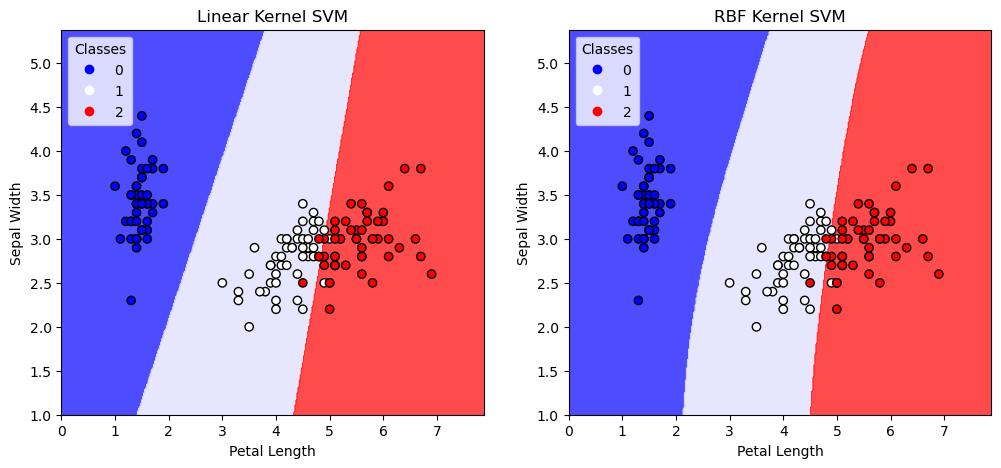

In [256]:
#Plotting decision boundary for the Linear kernel SVM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
decision_boundary(SVM_Linear_model, "Linear Kernel SVM")

#Plotting decision boundary for the RBF kernel SVM
plt.subplot(1, 2, 2)
decision_boundary(SVM_RBF_model, "RBF Kernel SVM")
plt.show()

In [257]:
from sklearn.metrics import classification_report

#Classification Report for SVM Linear Model
y_pre = SVM_Linear_model.predict(X)
print(classification_report(y, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [258]:
#Classification Report for SVM RBF Model
y_pre1 = SVM_RBF_model.predict(X)
print(classification_report(y, y_pre1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



From the classification report we can observe that for the models i.e. Linear and RBF the accuray score is 0.96 and 0.95, which indicates that both the model perfom well. But **SVM Linear model perform slightly better than SVM RBF model** while seperating the 3 classes.

The reason for slight difference can be observed from the decision boundry plot also. In the plot we can observe that for Class 0 all the datapoints belongs the same class for both the models, but for Class 1 and Class 2 one of the Class 1 datapoint(white) is inside the decision boundry of Class 2 in SVM RBF model. Because of this there is a slight difference in the accuracy of both the models.

**Refrences -**

1. https://numpy.org/doc/stable/reference/index.html

2. https://scikit-learn.org/stable/tutorial/basic/tutorial.html
        
3. https://matplotlib.org/stable/tutorials/introductory/pyplot.html
        
4. https://pandas.pydata.org/docs/user_guide/10min.html
            
5. https://seaborn.pydata.org/generated/seaborn.scatterplot.html

6. https://scikit-learn.org/stable/modules/svm.html

7. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

8. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

9. https://stats.stackexchange.com/questions/499916/why-svm-with-gamma-scale-for-rbf-kernel-works-so-well#:~:text=The%20intuitive%20explanation%20for%20the%20gamma%20parameter%20of,values%20meaning%20%E2%80%98far%E2%80%99%20and%20high%20values%20meaning%20%E2%80%98close%E2%80%99.

10. https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

